In [123]:
import pandas as pd # importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [124]:
def myFnLinReg(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    numerator = 0
    denominator = 0
    for i in range(n):
        numerator = numerator + (x[i] - x_mean) * (y[i] - y_mean)
        denominator = denominator + (x[i] - x_mean) ** 2
    a = numerator / denominator
    b = y_mean - (a * x_mean)
    return a, b

## 2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [125]:
mt=pd.read_csv("C:\\Users\\yaswa\\Downloads\\mtcars.csv")
mt.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mt["wt"],mt["mpg"],test_size=0.2,random_state=40)

In [127]:
a, b = myFnLinReg(x_train.values,y_train.values)
y_pred = x_test*a+b

In [128]:
print("y = ", a, "x + ", b)

y =  -5.609906362544769 x +  38.10981105517327


## 3. What is the mpg of a car, whose weight is 5.5?

In [129]:
print(a*5.5+b)

7.255326061177037


## 4. Compute and print accuracy measures such as RMSE and R2 for the test set.

In [130]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

4.295081412722076

In [131]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2*100,'%')

55.282889953121874 %



## 5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

In [142]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = 1 #only one feature - "wt" 
    
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) 
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(np.dot(sample_x.T,sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: 
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_train.values,y_train.values,100000)
w_sgd, b_sgd, cost_sgd

(array([-5.54536364]), array([37.89391131]), array([38.48346994]))

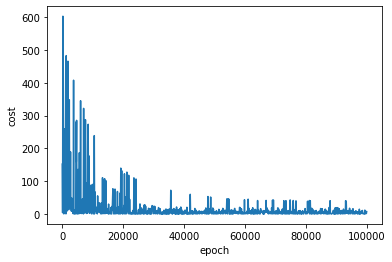

In [143]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [144]:
ypred_1 = x_test*w_sgd+b_sgd
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,ypred_1)
rmse=np.sqrt(mse)
rmse

4.278953922451916

In [145]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ypred_1)
print(r2*100,'%')

55.618073726273806 %


In [146]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size , learning_rate = 0.01):
    
    number_of_features = 1
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] 
    
    if batch_size > total_samples: 
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
       
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size].reshape(batch_size, 1)
            yj = y_tmp[j:j+batch_size]
            
            
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*np.dot(Xj.T,(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) 
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_mgd, b_mgd, cost_mgd, cost_list_mgd, epoch_list_mgd = mini_batch_gradient_descent(
    x_train.values,
    y_train.values,
    epochs = 2000,
    batch_size = 5
)
w_mgd, b_mgd, cost_mgd

(array([-5.64164605]), 38.05402047693206, 5.911636224997716)

In [147]:
ypred_2 = x_test*w_mgd+b_mgd
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,ypred_2)
rmse=np.sqrt(mse)
rmse

4.311302096995518

In [148]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, ypred_2)
print(r2*100,'%')

54.94449740255363 %


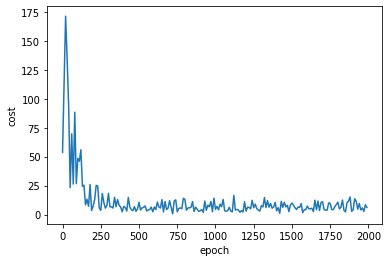

In [149]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mgd,cost_list_mgd)

In [150]:
#observations
#all the models gave accuracy of around 55% - not much improvement
#one reason for this could be small size of dataset - more data would have helped
#more iterations of the gradient descent doesn't seem to help, the cost evens out at a stable value
#all of them also had similar rmse scores